# Classification Model

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

### Load The Data
Using our cleaned data

In [7]:
def load_cleaned_data(data_dir):
    all_files = glob(os.path.join(data_dir, "cleaned_boxing_data_*.csv"))
    dataframes = {}
    for file in all_files:
        df = pd.read_csv(file)
        movement_type = file.split("_")[-3]
        df['movement_type'] = movement_type
        file_name = os.path.basename(file)
        dataframes[file_name] = df
    return dataframes

In [8]:
data_dir = '../data/cleaned'
dfs = load_cleaned_data(data_dir)

for file_name, df in dfs.items():
    print(f"File: {file_name}")
    print(df.info())
    print(df.head())
    print(df.describe())

File: cleaned_boxing_data_cross_20241002_190731.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6001 entries, 0 to 6000
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   frame                 6001 non-null   float64
 1   timestamp             6001 non-null   float64
 2   movement_type         6001 non-null   object 
 3   left_shoulder         6001 non-null   object 
 4   right_shoulder        6001 non-null   object 
 5   left_elbow            6001 non-null   object 
 6   right_elbow           6001 non-null   object 
 7   left_wrist            6001 non-null   object 
 8   right_wrist           6001 non-null   object 
 9   left_hip              6001 non-null   object 
 10  right_hip             6001 non-null   object 
 11  left_shoulder_x       6001 non-null   float64
 12  left_shoulder_y       6001 non-null   float64
 13  left_shoulder_z       6001 non-null   float64
 14  right_shoulder_x    

             frame    timestamp  left_shoulder_x  left_shoulder_y  \
count  6244.000000  6244.000000      6244.000000      6244.000000   
mean   3675.150705    61.255682         0.537693         0.547534   
std    2101.811704    35.032004         0.038184         0.013220   
min     169.000000     2.816600         0.423056         0.507168   
25%    1856.750000    30.947450         0.515389         0.538987   
50%    3663.200000    61.056400         0.538394         0.548192   
75%    5408.250000    90.142150         0.560304         0.557557   
max    7437.800000   123.969600         0.644892         0.577524   

       left_shoulder_z  right_shoulder_x  right_shoulder_y  right_shoulder_z  \
count      6244.000000       6244.000000       6244.000000       6244.000000   
mean          0.085227          0.373155          0.536372         -0.001803   
std           0.049823          0.040926          0.013501          0.044137   
min          -0.061096          0.256536          0.496120

## Distribution of Movement Types

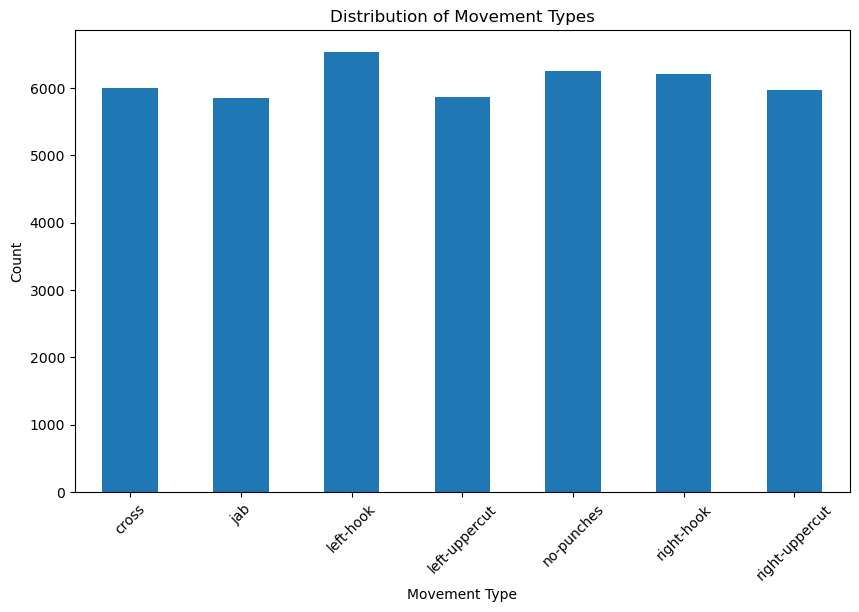

In [12]:
movement_counts = pd.Series(dtype=int)

for file_name, df in dfs.items():
    file_movement_counts = df['movement_type'].value_counts()
    movement_counts = movement_counts.add(file_movement_counts, fill_value=0)
    
plt.figure(figsize=(10, 6))
movement_counts.plot(kind='bar')
plt.title('Distribution of Movement Types')
plt.xlabel('Movement Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Prepare Features and Target

In [13]:
for file_name, df in dfs.items():
    print(f"Processing file: {file_name}")
    
    feature_columns = [col for col in df.columns if col.endswith(('_x', '_y', '_z', '_angle'))]
    X = df[feature_columns]
    y = df['movement_type']

Processing file: cleaned_boxing_data_cross_20241002_190731.csv
Processing file: cleaned_boxing_data_jab_20241002_190259.csv
Processing file: cleaned_boxing_data_left-hook_20241002_191201.csv
Processing file: cleaned_boxing_data_left-uppercut_20241002_192142.csv
Processing file: cleaned_boxing_data_no-punches_20241002_193049.csv
Processing file: cleaned_boxing_data_right-hook_20241002_191701.csv
Processing file: cleaned_boxing_data_right-uppercut_20241002_192607.csv


In [14]:
    # Split the Data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

In [ ]:
    # Train a Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimator=100, random_state=42)
    rf_classifier.fit(X_train_scaled, y_train)
    
    # make predictions
    y_pred = rf_classifier.predict(X_test_scaled)
    
    #Evaluate the Model
    print(f"Classification Report for {file_name}:")
    print(classification_report(y_test, y_pred))

In [ ]:
    # Plot a confusion matrix